# Project 3: Web APIs & NLP - Modelling
- Project 3 done by Anand Ramchandani

# Import Libraries

In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
sns.set_style("whitegrid")

import requests
import time
import string
import random
import scikitplot as skplt

from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix
from sklearn.metrics import roc_auc_score


from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import re
from wordcloud import WordCloud, STOPWORDS 

# Import Cleaned Data after EDA

In [169]:
train = pd.read_csv('../project_3/datasets/train.csv')

In [170]:
train.head()

,Unnamed: 0,subreddit,title_and_selftext
0,0,0,beer suggestion on r beer and you so you want ...
1,1,0,no stupid question wednesday ask anything abou...
2,2,0,what is the best thematic brewery taproom i m ...
3,3,0,asheville nc brewery recommendation i’ve looke...
4,4,0,i am mexican and i’m genuinely curious what wo...


In [171]:
train.drop(columns='Unnamed: 0', inplace=True)
train.head()

,subreddit,title_and_selftext
0,0,beer suggestion on r beer and you so you want ...
1,0,no stupid question wednesday ask anything abou...
2,0,what is the best thematic brewery taproom i m ...
3,0,asheville nc brewery recommendation i’ve looke...
4,0,i am mexican and i’m genuinely curious what wo...


In [172]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   subreddit           1188 non-null   int64 
 1   title_and_selftext  1188 non-null   object
dtypes: int64(1), object(1)
memory usage: 18.7+ KB


- Let us see how many posts are contributed by each subreddit:

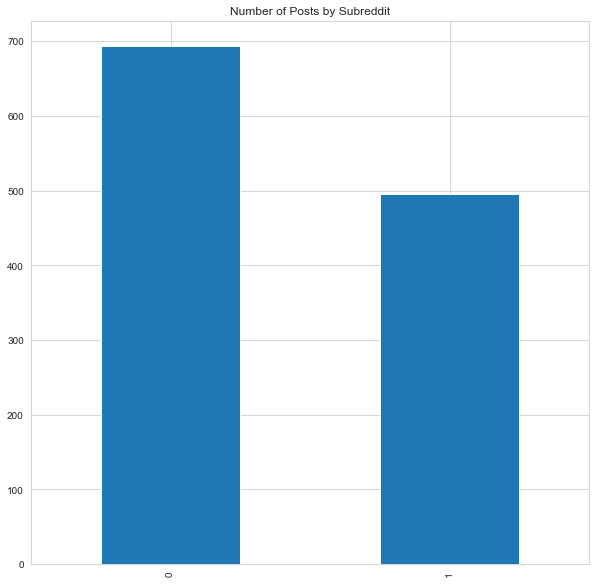

In [173]:
#Please note that 0 corresponds to Beer and 1 corresponds to Wine
plt.figure(figsize = (10,10))
plt.title('Number of Posts by Subreddit')
train['subreddit'].value_counts().plot(kind = 'bar');

## Stop Words

- Let us add some extra words that we deem should be included in the pre-existing english stop words set

In [174]:
from sklearn.feature_extraction import text

text.ENGLISH_STOP_WORDS

#Adding these stop words seen
adding_stop_words = ['did', 'doe', 'don', 'doesn', 'getting', 'going', 'got', 'ha', 'isn', 'wa']

stop_words = text.ENGLISH_STOP_WORDS.union(adding_stop_words)

- Let's look at the stopwords now

In [175]:
stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

# Tokenization and Lemmatization

- Here we intend to further process the column title_and_selftext with the aim of doing a wordcloud later on

In [176]:
tokenizer = RegexpTokenizer(r'[a-z]\w+')
lemmatizer = WordNetLemmatizer()

list_of_tokens = []

for text in train['title_and_selftext']:
    
    # Tokenization 
    result = []
    results = tokenizer.tokenize(text)
    
    for word in results:
        # Lemmatization 
        words = lemmatizer.lemmatize(word)
        result.append(words)
        
    list_of_tokens.append(result)

- Here we will convert the above list into strings

In [177]:
list_to_string = []
for i in list_of_tokens:
    listToStr = ' '.join([str(elem) for elem in i]) 
    list_to_string.append(listToStr)

In [178]:
list_to_string[:3]

['beer suggestion on beer and you so you want to ask reddit for new beerhi howdy hello no doubt you re here because you like to ask beer to help you find delicious beverage you re in luck because there are over people subscribed here on the other hand there are over people subscribed here some of them probably live near you or have similar access to all of the beer available to you most of them don what doe this mean for you well my friend it mean you have to help help you all too often well meaning drinker or curious party who would like to start drinking am right folk will show up on beer and post something like hi what beer should drink kthanksbye this is no good first it doesn give any information about you in order to suggest beer that you should buy we have to know what beer are available for you to buy you should start by first telling where you are this is absolutely the most important part there are lot of national company and behemoth corporation that can supply you with larg

# Word Cloud

- Here we shall analyse the most and least common words seen using a word cloud amongst r/beer and r/wine subreddits

In [179]:
# Stop words from given English set
stop_words_english = set(CountVectorizer(stop_words = 'english').get_stop_words())

In [180]:
# Stop words associated to word cloud
stop_words_wordcloud = set(STOPWORDS)

In [181]:
# Merging the stopwords
stopwords_merged = stop_words_english.union(stop_words_wordcloud)

In [182]:
stopwords_merged = stopwords_merged.union(stop_words)

## Most Common Words Seen in Both Subreddits

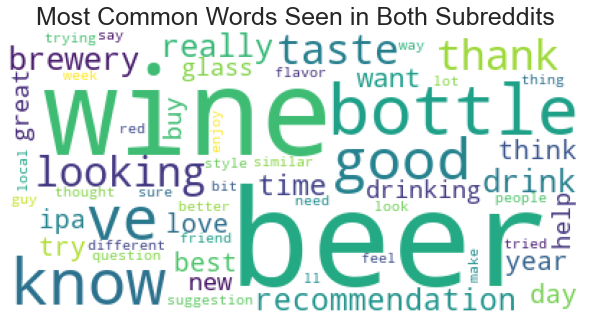

In [183]:
word = ''

for i in list_to_string: 
      
    # having i as each value in the string
    i = str(i) 
  
    # splitting up the values
    token = i.split() 
      
    # Converting all tokens into lowercase 
    
    for words in token: 
        word = word + words + ' '
  
  
wordcloud = WordCloud(
                background_color ='white', 
                stopwords = stopwords_merged, 
                min_font_size = 10).generate(word) 
  
# Plotting Most Common Words Seen in Both Subreddits as a WordCloud image

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Most Common Words Seen in Both Subreddits", fontsize=25);
  
plt.show()

## Most Common Words Seen in Beer Subreddits

- Before merging datasets for beer and wine in Data Cleaning and EDA, we noted that beer had 685 rows and wine has 483 rows, we will use this information for our wordcloud below

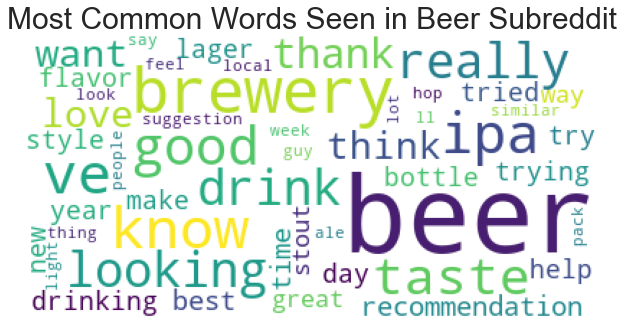

In [184]:
word = ''
for i in list_to_string[:684]: 
      
    # having i as each value in the string
    i = str(i) 
  
    # splitting up the values
    tokens = i.split() 
      
    # Converting all tokens into lowercase 
    
    for words in tokens: 
        word = word + words + ' '
  
  
wordcloud = WordCloud( 
                background_color ='white', 
                stopwords = stopwords_merged, 
                min_font_size = 10).generate(word) 
  
# Plotting Most Common Words Seen in Beer Subreddit as a WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Most Common Words Seen in Beer Subreddit", fontsize=30);
  
plt.show()

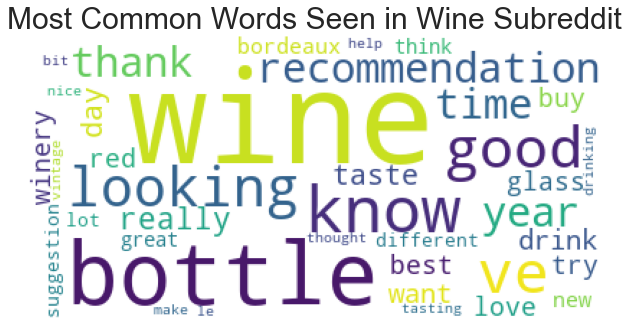

In [185]:
word = ''
for i in list_to_string[685:]: 
      
    # having i as each value in the string
    i = str(i) 
  
    # splitting up the values
    tokens = i.split() 
      
    # Converting all tokens into lowercase 
    
    for words in tokens: 
        word = word + words + ' '
  
  
wordcloud = WordCloud( 
                background_color ='white', 
                stopwords = stopwords_merged, 
                min_font_size = 10).generate(word) 
  
# Plotting Most Common Words Seen in Wine Subreddit as a WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Most Common Words Seen in Wine Subreddit", fontsize=30);
  
plt.show()

In [186]:
train.subreddit.value_counts(normalize = True)

0    0.583333
1    0.416667
Name: subreddit, dtype: float64

# Data Modelling

In [187]:
# Splitting the dataset into the training and test set

In [188]:
X = train['title_and_selftext']
y = train['subreddit']

In [189]:
len(X)

1188

In [190]:
len(y)

1188

## Check for Data Imbalance

In [191]:
y.value_counts(normalize=True)

0    0.583333
1    0.416667
Name: subreddit, dtype: float64

- We can see around 60% of the data comes from beer and 40% comes from wine, so this needs to be addressed

# Train/Test Split

In [192]:
# Split the data into the training and testing sets.
# Stratify y - in order to address imbalanced data classes
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42,
                                                    shuffle=True)

# Model 1: CountVectorizer with Logistic Regression 

In [193]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer
# 2. LogisticRegression

pipe = Pipeline([
    ('cvec', CountVectorizer()), 
    ('lr', LogisticRegression()) 
])

In [194]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 50, 100, 500, 1000, 1500
# Minimum number of documents needed to include token: 2, 3, 5
# Maximum number of documents needed to include token: 75%, 80%, 90%, 95%

params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__max_features': [50, 100, 500, 1000, 1500],
    'cvec__min_df': [2,3,5],
    'cvec__max_df': [.75, .8, .9, .95]
   
}

In [195]:
# Instantiate GridSearchCV.
gs = GridSearchCV(pipe,
                  param_grid=params,
                  cv=5)

In [196]:
# Fit GridSearch to training data.
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.75, 0.8, 0.9, 0.95],
                         'cvec__max_features': [50, 100, 500, 1000, 1500],
                         'cvec__min_df': [2, 3, 5],
                         'cvec__stop_words': [None, 'english']})

In [197]:
# What's the best score?
print(f'gs.best.score_: {gs.best_score_}') 

gs.best.score_: 0.9572327044025158


In [198]:
# What are the best parameters?
print(f'gs.best.params_: {gs.best_params_}')

gs.best.params_: {'cvec__max_df': 0.75, 'cvec__max_features': 500, 'cvec__min_df': 2, 'cvec__stop_words': 'english'}


In [199]:
gs.best_estimator_

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.75, max_features=500, min_df=2,
                                 stop_words='english')),
                ('lr', LogisticRegression())])

In [200]:
# Score model on training set.
gs.score(X_train, y_train)

0.9987421383647799

In [201]:
# Score model on testing set.
gs.score(X_test, y_test)

0.9440203562340967

## Predictions for CountVectorizer with Logistic Regression 

In [202]:
# Predictions test data
predictions = gs.predict(X_test)

In [203]:
# Values from Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)

misclassification = 1 - accuracy

print(f'Accuracy rate: {accuracy}')
print(f'Misclassification rate: {misclassification}')

Accuracy rate: 0.9440203562340967
Misclassification rate: 0.05597964376590325


## Confusion Matrix for CountVectorizer with Logistic Regression

In [204]:
# Confusion Matrix Table for CountVectorizer with Logistic Regression
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(data=cm, 
                     columns=['Predictions for r/beer',
                              'Predictions for r/wine'], 
                     index=['Actual for r/beer',
                            'Actual for r/wine'])
cm_df

,Predictions for r/beer,Predictions for r/wine
Actual for r/beer,222,7
Actual for r/wine,15,149


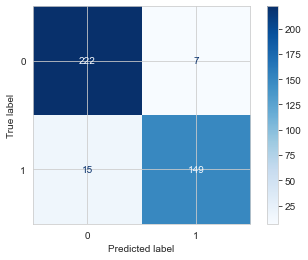

In [205]:
plot_confusion_matrix(gs, X_test, y_test,  cmap='Blues', values_format='d');

## Calculating Sensitivity and Specificity of CountVectorizer with Logistic Regression

In [206]:
sensitivity = round(tp/(tp+fn),3)
specificity = round(tn/(tn+fp),3)
precision = round(tp/(tp+fp),3)
print(f"CountVectorizer with Logistic Regression Sensitivity is: {sensitivity}")
print(f"CountVectorizer with Logistic Regression Specificity is: {specificity}")
print(f"CountVectorizer with Logistic Regression Precision is: {precision}")

CountVectorizer with Logistic Regression Sensitivity is: 0.909
CountVectorizer with Logistic Regression Specificity is: 0.969
CountVectorizer with Logistic Regression Precision is: 0.955


## Generating ROC Curve - Hyperparamater Tuned CountVectorizer with Logistic Regression

In [207]:
# Reinstantiating CVEC with hyperparameters garnered from Gridsearch
cvec = CountVectorizer(max_df = 0.75,
                       max_features = 1000,
                       min_df = 2,
                       stop_words = 'english')
lr = LogisticRegression()

In [208]:
# Fit our datasets
X_train_cvec_features = cvec.fit_transform(X_train)
X_test_cvec_features = cvec.transform(X_test)

In [209]:
# Converting to numpy array
X_train_cvec_features = X_train_cvec_features.toarray()

In [210]:
X_test_cvec_features = X_test_cvec_features.toarray()

In [211]:
# Fitting Logistic Regression to the CountVectorizer processed data
lr.fit(X_train_cvec_features, y_train)

LogisticRegression()

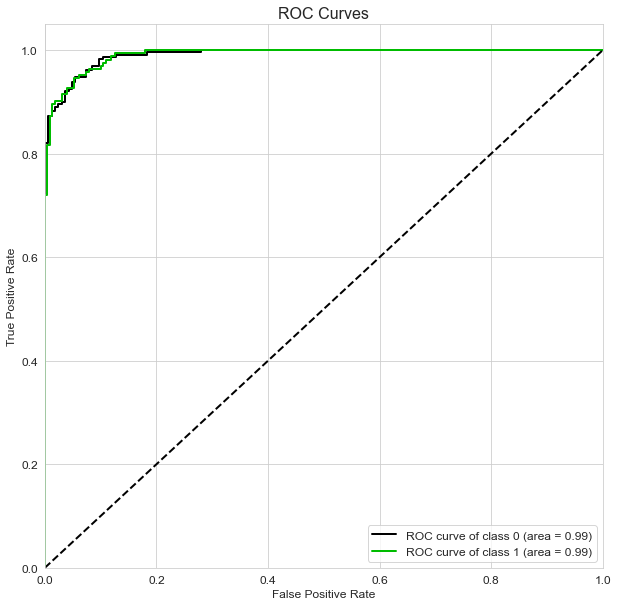

In [212]:
# ROC Curve

y_probas = lr.predict_proba(X_test_cvec_features)

skplt.metrics.plot_roc(y_test, y_probas,
                       plot_macro=False,
                       plot_micro=False,
                       figsize=(10,10),
                       title_fontsize=16,
                       text_fontsize=12)
plt.show()

# Class 0 is r/beer
# Class 1 is r/wine

- The CountVectorizer with Logistic Regression has an ROC of 0.9 for both r/beer and r/wine
- Our model is able to properly classify the post between these two different subreddits

# Model 2: CountVectorizer with MultinomialNB

In [213]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer
# 2. MultinomialNB

pipe = Pipeline([
    ('cvec', CountVectorizer()), 
    ('nb', MultinomialNB())
])

params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__max_features': [50, 100, 500, 1000, 1500],
    'cvec__min_df': [2,3,5],
    'cvec__max_df': [.75, .8, .9, .95]
   
}

# Instantiate GridSearchCV.
gs = GridSearchCV(pipe, param_grid=params, cv=3)

gs.fit(X_train, y_train) 

# What's the best score?
print(f'gs.best.score_: {gs.best_score_}') 

# What are the best parameters?
print(f'gs.best.params_: {gs.best_params_}')

print(f'gs.best_estimator: {gs.best_estimator_}')

# Score model on training set.
print(f'Train score: {gs.score(X_train, y_train)}')

# Score model on testing set.
print(f'Test score: {gs.score(X_test, y_test)}')

gs.best.score_: 0.9647798742138365
gs.best.params_: {'cvec__max_df': 0.75, 'cvec__max_features': 1000, 'cvec__min_df': 3, 'cvec__stop_words': 'english'}
gs.best_estimator: Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.75, max_features=1000, min_df=3,
                                 stop_words='english')),
                ('nb', MultinomialNB())])
Train score: 0.9874213836477987
Test score: 0.9465648854961832


## Predictions for CountVectorizer with MultinomialNB

In [214]:
# Predictions test data
predictions = gs.predict(X_test)

# Values from Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)

misclassification = 1 - accuracy

print(f'Accuracy rate: {accuracy}')
print(f'Misclassification rate: {misclassification}')

Accuracy rate: 0.9465648854961832
Misclassification rate: 0.05343511450381677


## Confusion Matrix for CountVectorizer with MultinomialNB

In [215]:
# Confusion Matrix Table for CountVectorizer with MultinomialNB
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(data=cm, 
                     columns=['Predictions for r/beer',
                              'Predictions for r/wine'], 
                     index=['Actual for r/beer',
                            'Actual for r/wine'])
cm_df

,Predictions for r/beer,Predictions for r/wine
Actual for r/beer,214,15
Actual for r/wine,6,158


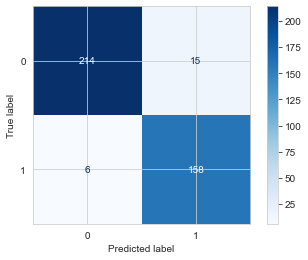

In [216]:
plot_confusion_matrix(gs, X_test, y_test,  cmap='Blues', values_format='d');

## Calculating Sensitivity and Specificity of CountVectorizer with MultinomialNB

In [217]:
sensitivity = round(tp/(tp+fn),3)
specificity = round(tn/(tn+fp),3)
precision = round(tp/(tp+fp),3)
print(f"CountVectorizer with Logistic Regression Sensitivity is: {sensitivity}")
print(f"CountVectorizer with Logistic Regression Specificity is: {specificity}")
print(f"CountVectorizer with Logistic Regression Precision is: {precision}")

CountVectorizer with Logistic Regression Sensitivity is: 0.963
CountVectorizer with Logistic Regression Specificity is: 0.934
CountVectorizer with Logistic Regression Precision is: 0.913


## Generating ROC Curve - Hyperparamater Tuned CountVectorizer with MultinomialNB

In [218]:
# Reinstantiating CVEC with hyperparameters garnered from Gridsearch
cvec = CountVectorizer(max_df = 0.75,
                       max_features = 1500,
                       min_df = 2,
                       stop_words = 'english')
nb = MultinomialNB()

# Fit our datasets
X_train_cvec_features = cvec.fit_transform(X_train)
X_test_cvec_features = cvec.transform(X_test)

# Converting to numpy array
X_train_cvec_features = X_train_cvec_features.toarray()
X_test_cvec_features = X_test_cvec_features.toarray()

# Fitting Logistic Regression to the CountVectorizer processed data
nb.fit(X_train_cvec_features, y_train)

MultinomialNB()

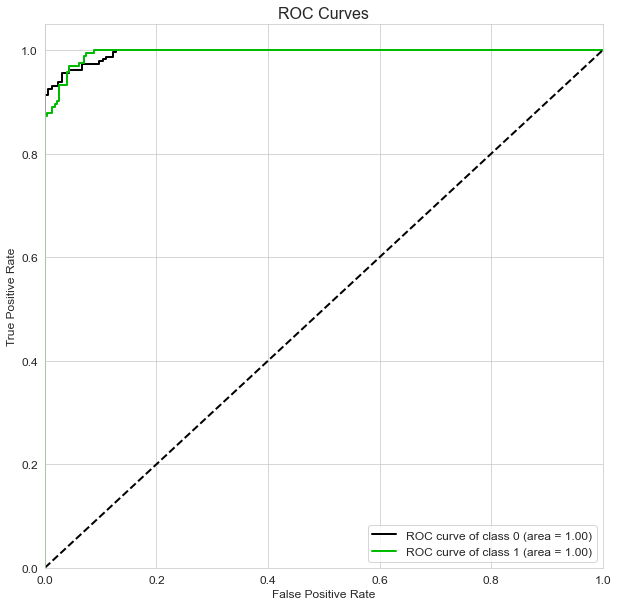

In [219]:
# ROC Curve

y_probas = nb.predict_proba(X_test_cvec_features)

skplt.metrics.plot_roc(y_test, y_probas,
                       plot_macro=False,
                       plot_micro=False,
                       figsize=(10,10),
                       title_fontsize=16,
                       text_fontsize=12)
plt.show()

# Class 0 is r/beer
# Class 1 is r/wine

- The CountVectorizer with MultinomialNB has an ROC of 0.99 for both r/beer and r/wine
- Our model is able to properly classify the post between these two different subreddits

# Model 3: CountVectorizer with Random Forest

In [220]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer
# 2. Random Forest

pipe = Pipeline([
    ('cvec', CountVectorizer()), 
    ('rf', RandomForestClassifier())
])

params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__max_features': [50, 100, 500, 1000, 1500],
    'cvec__min_df': [2,3,5],
    'cvec__max_df': [.75, .8, .9, .95]
   
}

# Instantiate GridSearchCV.
gs = GridSearchCV(pipe, param_grid=params, cv=3)

gs.fit(X_train, y_train) 

# What's the best score?
print(f'gs.best.score_: {gs.best_score_}') 

# What are the best parameters?
print(f'gs.best.params_: {gs.best_params_}')

print(f'gs.best_estimator: {gs.best_estimator_}')

# Score model on training set.
print(f'Train score: {gs.score(X_train, y_train)}')

# Score model on testing set.
print(f'Test score: {gs.score(X_test, y_test)}')

gs.best.score_: 0.9572327044025157
gs.best.params_: {'cvec__max_df': 0.95, 'cvec__max_features': 500, 'cvec__min_df': 5, 'cvec__stop_words': 'english'}
gs.best_estimator: Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.95, max_features=500, min_df=5,
                                 stop_words='english')),
                ('rf', RandomForestClassifier())])
Train score: 1.0
Test score: 0.9465648854961832


## Predictions for CountVectorizer with Random Forest 

In [221]:
# Predictions test data
predictions = gs.predict(X_test)

# Values from Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)

misclassification = 1 - accuracy

print(f'Accuracy rate: {accuracy}')
print(f'Misclassification rate: {misclassification}')

Accuracy rate: 0.9465648854961832
Misclassification rate: 0.05343511450381677


## Confusion Matrix for CountVectorizer with Random Forest

In [222]:
# Confusion Matrix Table for CountVectorizer with Random Forest
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(data=cm, 
                     columns=['Predictions for r/beer',
                              'Predictions for r/wine'], 
                     index=['Actual for r/beer',
                            'Actual for r/wine'])
cm_df

,Predictions for r/beer,Predictions for r/wine
Actual for r/beer,222,7
Actual for r/wine,14,150


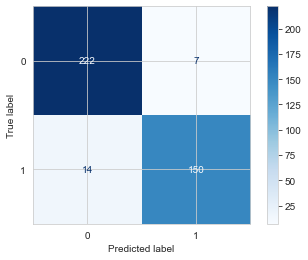

In [223]:
plot_confusion_matrix(gs, X_test, y_test,  cmap='Blues', values_format='d');

## Calculating Sensitivity and Specificity of CountVectorizer with Random Forest

In [224]:
sensitivity = round(tp/(tp+fn),3)
specificity = round(tn/(tn+fp),3)
precision = round(tp/(tp+fp),3)
print(f"CountVectorizer with Logistic Regression Sensitivity is: {sensitivity}")
print(f"CountVectorizer with Logistic Regression Specificity is: {specificity}")
print(f"CountVectorizer with Logistic Regression Precision is: {precision}")

CountVectorizer with Logistic Regression Sensitivity is: 0.915
CountVectorizer with Logistic Regression Specificity is: 0.969
CountVectorizer with Logistic Regression Precision is: 0.955


# Generating ROC Curve - Hyperparamater Tuned CountVectorizer with Random Forest

In [225]:
# Reinstantiating CVEC with hyperparameters garnered from Gridsearch
cvec = CountVectorizer(max_df = 0.8,
                       max_features = 1000,
                       min_df = 5,
                       stop_words = 'english')
rf = RandomForestClassifier()

# Fit our datasets
X_train_cvec_features = cvec.fit_transform(X_train)
X_test_cvec_features = cvec.transform(X_test)

# Converting to numpy array
X_train_cvec_features = X_train_cvec_features.toarray()
X_test_cvec_features = X_test_cvec_features.toarray()

# Fitting Logistic Regression to the CountVectorizer processed data
rf.fit(X_train_cvec_features, y_train)

RandomForestClassifier()

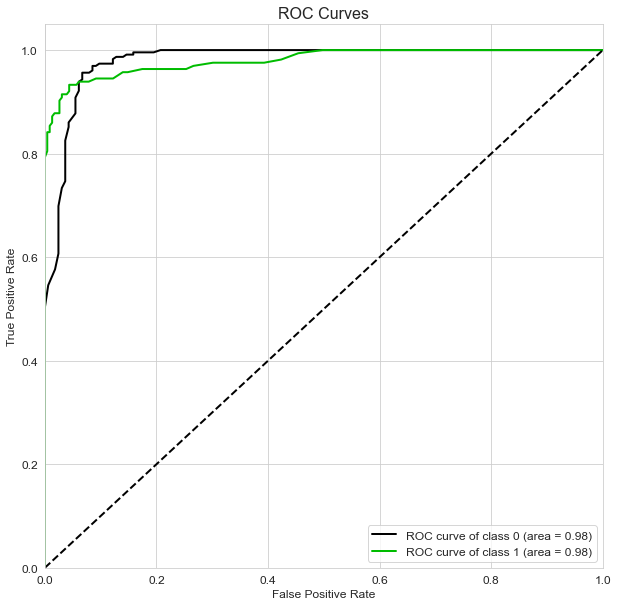

In [226]:
# ROC Curve

y_probas = rf.predict_proba(X_test_cvec_features)

skplt.metrics.plot_roc(y_test, y_probas,
                       plot_macro=False,
                       plot_micro=False,
                       figsize=(10,10),
                       title_fontsize=16,
                       text_fontsize=12)
plt.show()

# Class 0 is r/beer
# Class 1 is r/wine

- The CountVectorizer with Random Forest has an ROC of 0.99 for both r/beer and r/wine
- Our model is able to properly classify the post between these two different subreddits

# Model 4: TF-IDF Vectorizer with Logistic Regression

In [227]:
# Let's set a pipeline up with two stages:
# 1. TF-IDF Vectorizer
# 2. Logistic Regression

pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression()) 
])

params = {
    'tfidf__stop_words': [None, 'english'],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_df': [.85, .9, .95],
    'tfidf__min_df': [2, 4, 6],
    'tfidf__max_features': [1000, 2000, 3000],
}

#Gridsearch
gs = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)

#Fit
gs.fit(X_train, y_train)

# What's the best score?
print(f'gs.best.score_: {gs.best_score_}') 

# What are the best parameters?
print(f'gs.best.params_: {gs.best_params_}')

print(f'gs.best_estimator: {gs.best_estimator_}')

# Score model on training set.
print(f'Train score: {gs.score(X_train, y_train)}')

# Score model on testing set.
print(f'Test score: {gs.score(X_test, y_test)}')

gs.best.score_: 0.9635220125786164
gs.best.params_: {'tfidf__max_df': 0.85, 'tfidf__max_features': 1000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 1), 'tfidf__stop_words': 'english'}
gs.best_estimator: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.85, max_features=1000, min_df=2,
                                 stop_words='english')),
                ('lr', LogisticRegression())])
Train score: 0.989937106918239
Test score: 0.9491094147582697


## Predictions for TF-IDF Vectorizer with Logistic Regression 

In [228]:
# Predictions test data
predictions = gs.predict(X_test)

# Values from Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)

misclassification = 1 - accuracy

print(f'Accuracy rate: {accuracy}')
print(f'Misclassification rate: {misclassification}')

Accuracy rate: 0.9491094147582697
Misclassification rate: 0.05089058524173029


## Confusion Matrix for TF-IDF Vectorizer with Logistic Regression

In [229]:
# Confusion Matrix Table for TF-IDF Vectorizer with Logistic Regression
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(data=cm, 
                     columns=['Predictions for r/beer',
                              'Predictions for r/wine'], 
                     index=['Actual for r/beer',
                            'Actual for r/wine'])
cm_df

,Predictions for r/beer,Predictions for r/wine
Actual for r/beer,225,4
Actual for r/wine,16,148


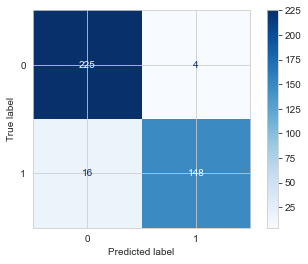

In [230]:
plot_confusion_matrix(gs, X_test, y_test,  cmap='Blues', values_format='d');

## Calculating Sensitivity and Specificity of TF-IDF Vectorizer with Logistic Regression

In [231]:
sensitivity = round(tp/(tp+fn),3)
specificity = round(tn/(tn+fp),3)
precision = round(tp/(tp+fp),3)
print(f"CountVectorizer with Logistic Regression Sensitivity is: {sensitivity}")
print(f"CountVectorizer with Logistic Regression Specificity is: {specificity}")
print(f"CountVectorizer with Logistic Regression Precision is: {precision}")

CountVectorizer with Logistic Regression Sensitivity is: 0.902
CountVectorizer with Logistic Regression Specificity is: 0.983
CountVectorizer with Logistic Regression Precision is: 0.974


## Generating ROC Curve - Hyperparamater Tuned TF-IDF Vectorizer with Logistic Regression 

In [232]:
# Reinstantiating TF-IDF Vectorizer with hyperparameters garnered from Gridsearch

tfidf = TfidfVectorizer(max_df = 0.85,
                        max_features = 1000,
                        min_df = 2,
                        ngram_range = (1, 2),
                        stop_words = 'english')

lr = LogisticRegression()

# Fit our datasets
X_train_tfidf_features = tfidf.fit_transform(X_train)
X_test_tfidf_features = tfidf.transform(X_test)

# Converting to numpy array
X_train_tfidf_features = X_train_tfidf_features.toarray()
X_test_tfidf_features = X_test_tfidf_features.toarray()

# Fitting Logistic Regression to the CountVectorizer processed data
lr.fit(X_train_tfidf_features, y_train)

LogisticRegression()

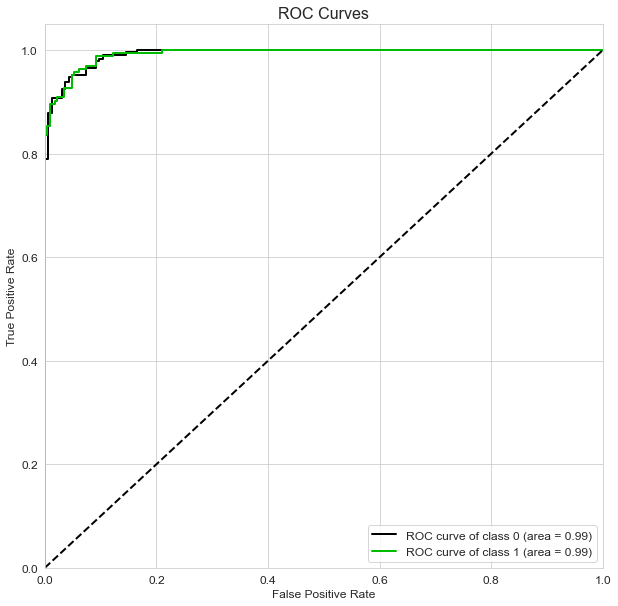

In [233]:
# ROC Curve

y_probas = lr.predict_proba(X_test_tfidf_features)

skplt.metrics.plot_roc(y_test, y_probas,
                       plot_macro=False,
                       plot_micro=False,
                       figsize=(10,10),
                       title_fontsize=16,
                       text_fontsize=12)
plt.show()

# Class 0 is r/beer
# Class 1 is r/wine

- The TF-IDF Vectorizer with Logistic Regression has an ROC of 1 for both r/beer and r/wine
- Our model is able to properly classify the post between these two different subreddits

# Model 5: TF-IDF Vectorizer with MultinomialNB

In [234]:
# Let's set a pipeline up with two stages:
# 1. TF-IDF Vectorizer
# 2. MultinomialNB

pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

params = {
    'tfidf__stop_words': [None, 'english'],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_df': [.85, .9, .95],
    'tfidf__min_df': [2, 4, 6],
    'tfidf__max_features': [1000, 2000, 3000],
}

#Gridsearch
gs = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)

#Fit
gs.fit(X_train, y_train)

# What's the best score?
print(f'gs.best.score_: {gs.best_score_}') 

# What are the best parameters?
print(f'gs.best.params_: {gs.best_params_}')

print(f'gs.best_estimator: {gs.best_estimator_}')

# Score model on training set.
print(f'Train score: {gs.score(X_train, y_train)}')

# Score model on testing set.
print(f'Test score: {gs.score(X_test, y_test)}')

gs.best.score_: 0.9635220125786162
gs.best.params_: {'tfidf__max_df': 0.85, 'tfidf__max_features': 2000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': 'english'}
gs.best_estimator: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.85, max_features=2000, min_df=2,
                                 ngram_range=(1, 2), stop_words='english')),
                ('nb', MultinomialNB())])
Train score: 0.9874213836477987
Test score: 0.9567430025445293


## Predictions for TF-IDF Vectorizer with MultinomialNB

In [235]:
# Predictions test data
predictions = gs.predict(X_test)

# Values from Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)

misclassification = 1 - accuracy

print(f'Accuracy rate: {accuracy}')
print(f'Misclassification rate: {misclassification}')

Accuracy rate: 0.9567430025445293
Misclassification rate: 0.043256997455470736


## Confusion Matrix for TF-IDF Vectorizer with MultinomialNB

In [236]:
# Confusion Matrix Table for TF-IDF Vectorizer with MultinomialNB
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(data=cm, 
                     columns=['Predictions for r/beer',
                              'Predictions for r/wine'], 
                     index=['Actual for r/beer',
                            'Actual for r/wine'])
cm_df

,Predictions for r/beer,Predictions for r/wine
Actual for r/beer,226,3
Actual for r/wine,14,150


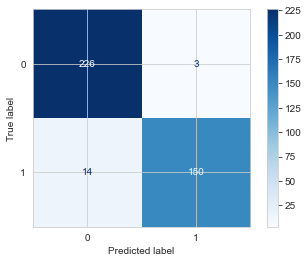

In [237]:
plot_confusion_matrix(gs, X_test, y_test,  cmap='Blues', values_format='d');

## Calculating Sensitivity and Specificity of TF-IDF Vectorizer with MultinomialNB

In [238]:
sensitivity = round(tp/(tp+fn),3)
specificity = round(tn/(tn+fp),3)
precision = round(tp/(tp+fp),3)
print(f"CountVectorizer with Logistic Regression Sensitivity is: {sensitivity}")
print(f"CountVectorizer with Logistic Regression Specificity is: {specificity}")
print(f"CountVectorizer with Logistic Regression Precision is: {precision}")

CountVectorizer with Logistic Regression Sensitivity is: 0.915
CountVectorizer with Logistic Regression Specificity is: 0.987
CountVectorizer with Logistic Regression Precision is: 0.98


## Generating ROC Curve - Hyperparamater Tuned TF-IDF Vectorizer with MultinomialNB

In [239]:
# Reinstantiating TF-IDF Vectorizer with hyperparameters garnered from Gridsearch

tfidf = TfidfVectorizer(max_df = 0.85,
                        max_features = 1000,
                        min_df = 4,
                        ngram_range = (1, 2),
                        stop_words = 'english')

nb = MultinomialNB()

# Fit our datasets
X_train_tfidf_features = tfidf.fit_transform(X_train)
X_test_tfidf_features = tfidf.transform(X_test)

# Converting to numpy array
X_train_tfidf_features = X_train_tfidf_features.toarray()
X_test_tfidf_features = X_test_tfidf_features.toarray()

# Fitting Logistic Regression to the CountVectorizer processed data
nb.fit(X_train_tfidf_features, y_train)

MultinomialNB()

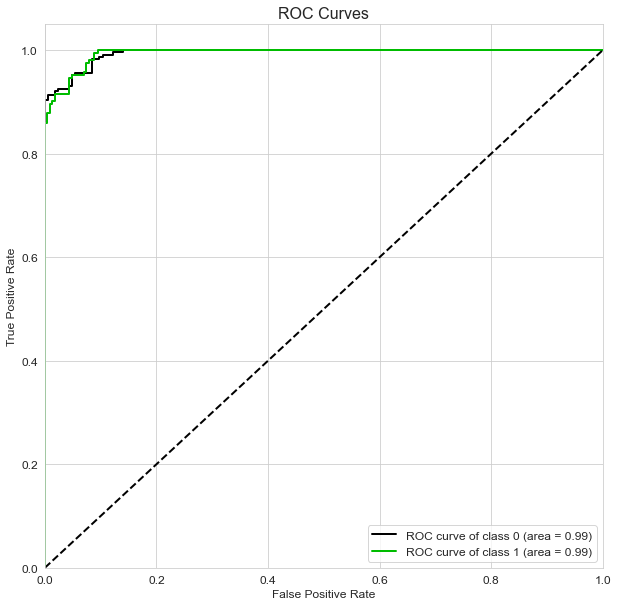

In [240]:
# ROC Curve

y_probas = nb.predict_proba(X_test_tfidf_features)

skplt.metrics.plot_roc(y_test, y_probas,
                       plot_macro=False,
                       plot_micro=False,
                       figsize=(10,10),
                       title_fontsize=16,
                       text_fontsize=12)
plt.show()

# Class 0 is r/beer
# Class 1 is r/wine

- The TF-IDF Vectorizer with MultinomialNB has an ROC of 0.99 for both r/beer and r/wine
- Our model is able to properly classify the post between these two different subreddits

# Model 6: TF-IDF Vectorizer with Random Forest

In [241]:
# Let's set a pipeline up with two stages:
# 1. TF-IDF Vectorizer
# 2. Random Forest

pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier(random_state=42))
])

params = {
    'tfidf__stop_words': [None, 'english'],
    'tfidf__max_features': [50, 100, 500, 1000, 1500],      
    'tfidf__min_df': [2, 3, 5],
    'tfidf__max_df': [.75, .8, .9, .95],
    'rf__n_estimators': [10, 50, 100],  
    'rf__max_depth': [None, 3, 5],

   }   

#Gridsearch
gs = GridSearchCV(pipe, param_grid=params, cv=5)

#Fit
gs.fit(X_train, y_train)

# What's the best score?
print(f'gs.best.score_: {gs.best_score_}') 

# What are the best parameters?
print(f'gs.best.params_: {gs.best_params_}')

print(f'gs.best_estimator: {gs.best_estimator_}')

# Score model on training set.

print(f'Train score: {gs.score(X_train, y_train)}')

# Score model on testing set.
print(f'Test score: {gs.score(X_test, y_test)}')

gs.best.score_: 0.9572327044025158
gs.best.params_: {'rf__max_depth': None, 'rf__n_estimators': 50, 'tfidf__max_df': 0.75, 'tfidf__max_features': 1500, 'tfidf__min_df': 2, 'tfidf__stop_words': None}
gs.best_estimator: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.75, max_features=1500, min_df=2)),
                ('rf',
                 RandomForestClassifier(n_estimators=50, random_state=42))])
Train score: 1.0
Test score: 0.9363867684478372


## Predictions for TF-IDF Vectorizer with Random Forest 

In [242]:
# Predictions test data
predictions = gs.predict(X_test)

# Values from Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)

misclassification = 1 - accuracy

print(f'Accuracy rate: {accuracy}')
print(f'Misclassification rate: {misclassification}')

Accuracy rate: 0.9363867684478372
Misclassification rate: 0.06361323155216281


## Confusion Matrix for TF-IDF Vectorizer with Random Forest

In [243]:
# Confusion Matrix Table for CountVectorizer with Random Forest
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(data=cm, 
                     columns=['Predictions for r/beer',
                              'Predictions for r/wine'], 
                     index=['Actual for r/beer',
                            'Actual for r/wine'])
cm_df

,Predictions for r/beer,Predictions for r/wine
Actual for r/beer,220,9
Actual for r/wine,16,148


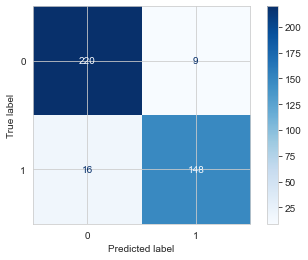

In [244]:
plot_confusion_matrix(gs, X_test, y_test,  cmap='Blues', values_format='d');

## Calculating Sensitivity and Specificity of TF-IDF Vectorizer with Random Forest

In [245]:
sensitivity = round(tp/(tp+fn),3)
specificity = round(tn/(tn+fp),3)
precision = round(tp/(tp+fp),3)
print(f"CountVectorizer with Logistic Regression Sensitivity is: {sensitivity}")
print(f"CountVectorizer with Logistic Regression Specificity is: {specificity}")
print(f"CountVectorizer with Logistic Regression Precision is: {precision}")

CountVectorizer with Logistic Regression Sensitivity is: 0.902
CountVectorizer with Logistic Regression Specificity is: 0.961
CountVectorizer with Logistic Regression Precision is: 0.943


## Generating ROC Curve - Hyperparamater Tuned TF-IDF Vectorizer with Random Forest

In [246]:
# Reinstantiating TF-IDF Vectorizer with hyperparameters garnered from Gridsearch

tfidf = TfidfVectorizer(max_df = 0.75,
                        max_features = 500,
                        min_df = 3,
                        ngram_range = (1, 2),
                        stop_words = 'english')

rf = RandomForestClassifier()

# Fit our datasets
X_train_tfidf_features = tfidf.fit_transform(X_train)
X_test_tfidf_features = tfidf.transform(X_test)

# Converting to numpy array
X_train_tfidf_features = X_train_tfidf_features.toarray()
X_test_tfidf_features = X_test_tfidf_features.toarray()

# Fitting Logistic Regression to the CountVectorizer processed data
rf.fit(X_train_tfidf_features, y_train)

RandomForestClassifier()

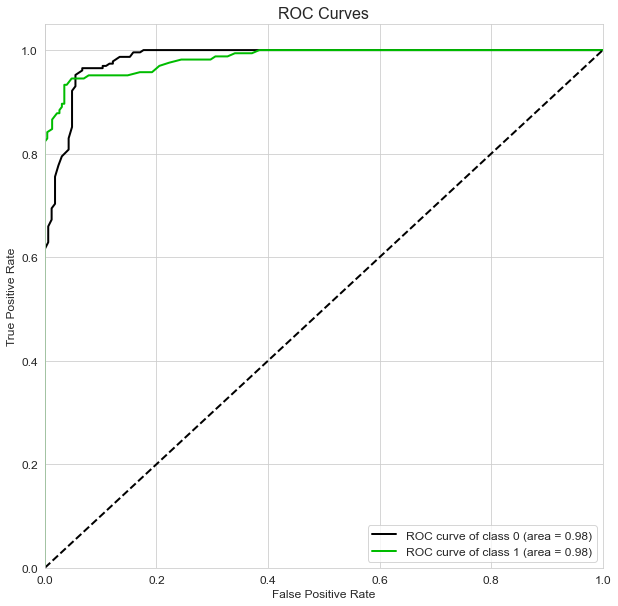

In [247]:
# ROC Curve

y_probas = rf.predict_proba(X_test_tfidf_features)

skplt.metrics.plot_roc(y_test, y_probas,
                       plot_macro=False,
                       plot_micro=False,
                       figsize=(10,10),
                       title_fontsize=16,
                       text_fontsize=12)
plt.show()
# Class 0 is r/investing
# Class 1 is r/wallstreetbets

# Model Evaluation

## Comparison of Models based on Accuracy and AUC Score on Test Data

|                          | CountVectorizer  |                 |                |                      | TF-IDF           |                 |                |                       |   |
|--------------------------|------------------|-----------------|----------------|----------------------|------------------|-----------------|----------------|-----------------------|---|
|                          | Accuracy (Train) | Accuracy (Test) | Generalisation | ROC-AUC Score (Test) | Accuracy (Train) | Accuracy (Test) | Generalisation | ROC-AUC Score (Test)  |   |
| Logistic Regression      | 0.998721228      | 0.96373057      | 3.503546005    | 0.99                 | 0.988491049      | 0.958549223     | 3.029043696    | 1                     |   |
| Multinomial Naïve-Bayes  | 0.993606138      | 0.966321244     | 2.746047306    | 0.99                 | 0.983375959      | 0.958549223     | 2.524643403    | 0.99                  |   |
| Random Forest            | 1                | 0.950777202     | 4.922279793    | 0.98                 | 1                | 0.961139896     | 3.886010363    | 0.98                  |   |



- The best generalisation and largest area under the ROC curve belongs to TF-IDF Vectorizer with Multinomial Naïve-Bayes

## Comparison of Models based on Sensitivity, Specificity and Precision

|                          | CountVectorizer |             |        | TF-IDF      |             |         |
|--------------------------|-----------------|-------------|--------|-------------|-------------|---------|
|                          | Sensitivity     | Specificity | Precision | Sensitivity | Specificity | Precision  |
| Logistic Regression      | 0.938           | 0.982       | 0.974  | 0.925       | 0.982       | 0.974   |
| Multinomial Naïve-Bayes  | 0.969           | 0.965       | 0.951  | 0.944       | 0.969       | 0.956   |
| Random Forest            | 0.931           | 0.987       | 0.98   | 0.931       | 0.982       | 0.974   |

**Criteria for choice:**
- Choose Sensitivity/Recall if the idea of false positives is far better than false negatives
- Choose Precision if you want to be more confident of your true positives
- Choose Specificity if you want to cover all true negatives, meaning you don’t want any false alarms, you don’t want any false positives  

- For this specific subreddit classification project I believe **Precision** would best suit our needs as it fits similarly to identifying spam mails. You’d rather have some spam emails in your inbox rather than some regular emails in your spam box. So, the email company wants to be extra sure that email Y is spam before they put it in the spam box and you never get to see it.

- In that case, Random Forest and Logistic Regression have better Precision values

## Comparison of Models based on Accuracy and Misclassification

|                          | CountVectorizer |                   | TF-IDF          |                    |   |   |   |   |   |
|--------------------------|-----------------|-------------------|-----------------|--------------------|---|---|---|---|---|
|                          | Accuracy (Test) | Misclassification | Accuracy (Test) | Misclassification  |   |   |   |   |   |
| Logistic Regression      | 0.96373057      | 0.03626943        | 0.958549223     | 0.041450777        |   |   |   |   |   |
| Multinomial Naïve-Bayes  | 0.966321244     | 0.033678756       | 0.958549223     | 0.041450777        |   |   |   |   |   |
| Random Forest            | 0.950777202     | 0.049222798       | 0.961139896     | 0.038860104        |  

- Here we can see that CountVectorizer with Multinomial Naïve-Bayes, CountVectorizer with Logistic Regression and TF-IDF with Random Forest have the highest

- Making a judgment call, we would choose **CountVectorizer with Logistic Regression** as the best model and vectorizer for our purposes

# Model Selected - CountVectorizer with Logistic Regression

In [248]:
pipe = Pipeline([
    ('cvec', CountVectorizer()), 
    ('lr', LogisticRegression())
])

params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__max_features': [50, 100, 500, 1000, 1500],
    'cvec__min_df': [2,3,5],
    'cvec__max_df': [.75, .8, .9, .95]
   
}

# Instantiate GridSearchCV.
gs = GridSearchCV(pipe, param_grid=params, cv=3)

gs.fit(X_train, y_train) 

# What's the best score?
print(f'gs.best.score_: {gs.best_score_}') 

# What are the best parameters?
print(f'gs.best.params_: {gs.best_params_}')

print(f'gs.best_estimator: {gs.best_estimator_}')

# Score model on training set.
print(f'Train score: {gs.score(X_train, y_train)}')

# Score model on testing set.
print(f'Test score: {gs.score(X_test, y_test)}')

gs.best.score_: 0.9584905660377357
gs.best.params_: {'cvec__max_df': 0.75, 'cvec__max_features': 1500, 'cvec__min_df': 2, 'cvec__stop_words': 'english'}
gs.best_estimator: Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.75, max_features=1500, min_df=2,
                                 stop_words='english')),
                ('lr', LogisticRegression())])
Train score: 1.0
Test score: 0.9440203562340967


## Most Common Words Seen in r/beer and r/wine

In [249]:
lr = gs.best_estimator_.steps[1][1]
feature_names = gs.best_estimator_.steps[0][1].get_feature_names()

In [250]:
lr_coefs = lr.coef_[0]

In [251]:
#Put the coeffs and the features in a dataframe
lr_coef_df = pd.DataFrame({'word_features':feature_names,
                              'coefs':lr_coefs})
lr_coef_df = lr_coef_df.sort_values('coefs')

In [252]:
# Most Common Words Seen in r/beer
lr_coef_df.head(10)

,word_features,coefs
129,beer,-2.641411
179,brewery,-1.465651
704,ipa,-0.896928
718,just,-0.756204
732,lager,-0.642573
645,heineken,-0.616820
65,ale,-0.613892
949,pack,-0.563072
1356,total,-0.556825
35,able,-0.449146


In [253]:
# Most Common Words Seen in r/wine
coef_df = pd.DataFrame([lr_coefs, feature_names], index = ['Coefficients', 'Features']).T
coef_df = coef_df.set_index('Features')
coef_df = coef_df.sort_values(by='Coefficients',ascending=False)
coef_df.head(10)

,Coefficients
Features,
wine,2.482989
bottle,0.97195
restaurant,0.914951
winery,0.809752
work,0.699909
decanter,0.685443
red,0.670083
champagne,0.646048
vineyard,0.633781


# Conclusion

- CountVectorizer with Logistic Regression chosen as most apt model for our classification purposes
- Key words between the 2 subreddits help immensely in message classification
- Differences outweigh similarities
- Can be a useful tool to aid marketing or strategy
- Model works well but will fail if message is too general 

# Recommendations

- Improve removal of noise words
- Try more models to see if any provide greater accuracy
- Collect more training data
- Can do more data cleaning (e.g. increase number of stop words)
- Better Gridsearching methods to optimise model selection
- If a new beer or wine nomenclature comes out accuracy could be affected in the future hence model may not be as accurate in long run
- We could test this model on similar alcohol reddits like whiskey, gin, vodka etc